In [1]:
# from ipfx.sweep import Sweep, SweepSet

In [24]:
import numpy as np
from ipfx.dataset.create import create_ephys_data_set

nwb_path = "/allen/programs/celltypes/production/humancelltypes/prod1/Ephys_Roi_Result_1084277304/Q21.26.006.14.01.03.nwb"         # PVALB
#nwb_path = "/allen/programs/celltypes/production/humancelltypes/prod0/Ephys_Roi_Result_998543710/nwb2_Q20.26.001.11.03.03.nwb"    # PVALB no complete long trace set
#nwb_path = "/allen/programs/celltypes/production/humancelltypes/prod46/Ephys_Roi_Result_1173272167/QN22.26.016.14.02A.03.nwb"    # CCK-VIP-TAC3

dataset = create_ephys_data_set(nwb_file=nwb_path)
long_squares = dataset.filtered_sweep_table(stimuli=dataset.ontology.long_square_names) # more on this next!
sweep_set = dataset.sweep_set(long_squares.sweep_number)


/local/anaconda3/envs/snakemake_ephys/lib/python3.8/site-packages/hdmf/spec/namespace.py:532: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/local/anaconda3/envs/snakemake_ephys/lib/python3.8/site-packages/hdmf/spec/namespace.py:532: UserWarning: Ignoring cached namespace 'core' version 2.2.4 because version 2.3.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


-110
30


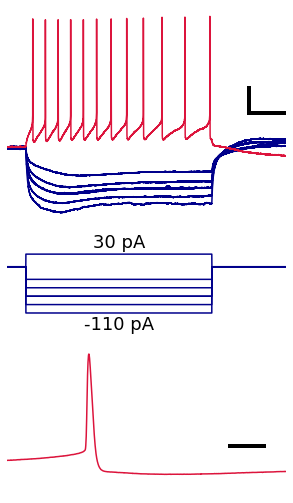

In [23]:
#import numpy as np
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

#sweep = dataset.sweep(sweep_number)
sweep_list = [10, 11, 19, 20, 22, 24, 32]   # CCK-VIP-TAC3
sweep_rheo = 32

fig,axs = plt.subplots(3,1, figsize = (5,9), sharex = True, gridspec_kw={'height_ratios': [1, 0.3, 0.7]})
all_i = np.array([])
for sw in sweep_list:
    sweep = dataset.sweep(sw)
    t = sweep.t
    v = sweep.v
    i = sweep.i
    if (sw == sweep_list[-1]):
        axs[0].plot(t,v,'crimson')
    else:
        axs[0].plot(t,v,'darkblue')
    axs[0].axis('off')

    axs[1].plot(t,i,'darkblue')
    axs[1].axis('off')
    if (sw == sweep_rheo):
        axs[2].plot(t,v, 'crimson')
        axs[2].axis('off')
    all_i = np.concatenate((all_i, np.squeeze(sweep.i)))
min_i = round(np.min(all_i))
max_i = round(np.max(all_i))
print(round(np.min(all_i)))
print(round(np.max(all_i)))

plt.xlim([0.5, 2.0])
g = axs[2].get_shared_x_axes()
g.remove(axs[0])
g.remove(axs[1])
axs[2].set_xlim([0.63, 0.655])
axs[0].plot([1.8, 2.0], [-40, -40], 'k', linewidth = 4)     # 200 ms
axs[0].plot([1.8, 1.8], [-20, -40], 'k', linewidth = 4)      # 20 mV
axs[2].plot([0.65, 0.653], [-40, -40], 'k', linewidth = 4)    # 3 ms

axs[1].text(1.1, max_i + 28, str(max_i) + ' pA', size = 18, color = 'k', horizontalalignment = 'center', verticalalignment = 'center')
axs[1].text(1.1, min_i - 28, str(min_i) + ' pA', size = 18, color = 'k', horizontalalignment = 'center', verticalalignment = 'center')

plt.savefig('/home/xiaoping.liu/raw_trace/CCK-VIP-TAC3_QN22260161402A03.png')
plt.show()

-110
130


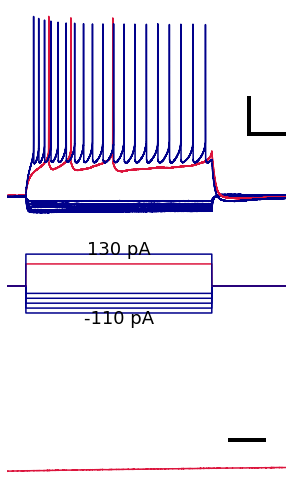

In [26]:
#import numpy as np
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

#sweep = dataset.sweep(sweep_number)
#sweep_list = [5, 6, 7, 8, 9, 16, 17, 18, 19, 20]   # PVALB    #16 maybe
sweep_list = [5, 6, 7, 8, 9, 17, 20]  
sweep_rheo = 17

fig,axs = plt.subplots(3,1, figsize = (5,9), sharex = True, gridspec_kw={'height_ratios': [1, 0.3, 0.7]})
all_i = np.array([])
for sw in sweep_list:
    sweep = dataset.sweep(sw)
    t = sweep.t
    v = sweep.v
    i = sweep.i
    if (sw == sweep_rheo):
        tr_color = 'crimson'
    else:
        tr_color = 'darkblue'
    axs[0].plot(t,v,tr_color)
    axs[0].axis('off')

    axs[1].plot(t,i,tr_color)
    axs[1].axis('off')
    if (sw == sweep_rheo):
        axs[2].plot(t,v, 'crimson')
        axs[2].axis('off')
    all_i = np.concatenate((all_i, np.squeeze(sweep.i)))
min_i = round(np.min(all_i))
max_i = round(np.max(all_i))
print(round(np.min(all_i)))
print(round(np.max(all_i)))

plt.xlim([0.5, 2.0])
g = axs[2].get_shared_x_axes()
g.remove(axs[0])
g.remove(axs[1])
axs[2].set_xlim([0.63, 0.655])     # 25 ms
axs[0].plot([1.8, 2.0], [-40, -40], 'k', linewidth = 4)     # 200 ms
axs[0].plot([1.8, 1.8], [-20, -40], 'k', linewidth = 4)      # 20 mV
axs[2].plot([0.65, 0.653], [-40, -40], 'k', linewidth = 4)    # 3 ms

axs[1].text(1.1, max_i + 21, str(max_i) + ' pA', size = 18, color = 'k', horizontalalignment = 'center', verticalalignment = 'center')
axs[1].text(1.1, min_i - 23, str(min_i) + ' pA', size = 18, color = 'k', horizontalalignment = 'center', verticalalignment = 'center')

plt.savefig('/home/xiaoping.liu/raw_trace/CCK-VIP-TAC3_QN22260161402A03.png')
plt.show()

In [175]:
long_squares = dataset.filtered_sweep_table(stimuli=dataset.ontology.long_square_names) # more on this next!
#sweep_set = dataset.sweep_set(long_squares.sweep_number
long_squares.sweep_number
#long_squares.columns
long_squares

,sweep_number,stimulus_units,bridge_balance_mohm,leak_pa,capacitance_compensation,sampling_rate,stimulus_scale_factor,stimulus_code,stimulus_code_ext,clamp_mode,stimulus_name
4,4,Amps,16.483517,NaN,2.999594,50000.0,10.0,X1PS_SubThresh,X1PS_SubThresh[0],CurrentClamp,Long Square
5,5,Amps,16.483517,NaN,2.999594,50000.0,10.0,X1PS_SubThresh,X1PS_SubThresh[1],CurrentClamp,Long Square
6,6,Amps,16.483517,NaN,2.999594,50000.0,10.0,X1PS_SubThresh,X1PS_SubThresh[2],CurrentClamp,Long Square
7,7,Amps,16.483517,NaN,2.999594,50000.0,10.0,X1PS_SubThresh,X1PS_SubThresh[3],CurrentClamp,Long Square
8,8,Amps,16.483517,NaN,2.999594,50000.0,10.0,X1PS_SubThresh,X1PS_SubThresh[4],CurrentClamp,Long Square
9,9,Amps,16.483517,-5.752213,2.999594,50000.0,10.0,X1PS_SubThresh,X1PS_SubThresh[5],CurrentClamp,Long Square
10,10,Amps,16.483517,-2.970923,2.999594,50000.0,10.0,X1PS_SubThresh,X1PS_SubThresh[6],CurrentClamp,Long Square
11,11,Amps,16.483517,-2.970923,2.999594,50000.0,10.0,X1PS_SubThresh,X1PS_SubThresh[7],CurrentClamp,Long Square
12,12,Amps,16.483517,-2.970923,2.999594,50000.0,10.0,X1PS_SubThresh,X1PS_SubThresh[8],CurrentClamp,Long Square
13,13,Amps,16.483517,-2.970923,2.999594,50000.0,10.0,X1PS_SubThresh,X1PS_SubThresh[9],CurrentClamp,Long Square


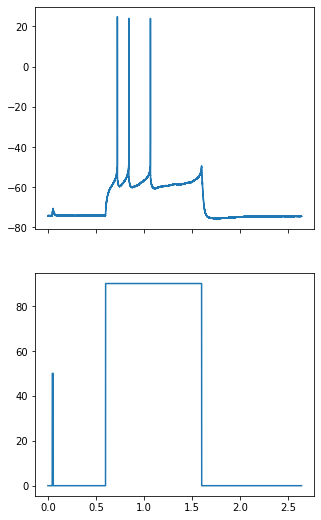

In [18]:
#View individual sweeps
i = 17

fig,axs = plt.subplots(2,1, figsize = (5,9), sharex=True)

sweep = dataset.sweep(i)
#sweep.align_to_start_of_epoch("experiment")
t = sweep.t
v = sweep.v
i = sweep.i
axs[0].plot(t,v)
axs[1].plot(t,i)

#plt.xlim([0.5, 2.0])
plt.show()

/local/anaconda3/envs/snakemake_ephys/lib/python3.8/site-packages/ipfx/stimulus.py:90: UserWarning: Could not find stimulus: FI
  warnings.warn("Could not find stimulus: %s" % tag)


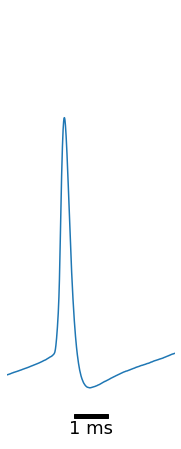

In [37]:
# For AP waveform, with scale ticker

sweep_list = [10]

fig,ax = plt.subplots(figsize = (3,8))

for i in sweep_list:
    sweep = dataset.sweep(i)
    t = sweep.t
    v = sweep.v
    i = sweep.i
    plt.plot(t,v)

plt.xlim([0.605, 0.61])
plt.ylim([-70, 40])

fontprops = fm.FontProperties(size=18)

scalebar = AnchoredSizeBar(plt.gca().transData,
                           0.001, '1 ms', 'lower center', 
                           pad=0.1,
                           color='black',
                           frameon=False,
                           size_vertical=1,
                           fontproperties=fontprops)

plt.gca().add_artist(scalebar)
plt.axis('off')
plt.gca().get_yaxis().set_visible(True)
plt.show()

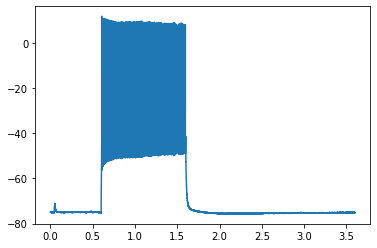